# 基于Keras实现iris鸢花分类

鸢尾花(Iris)数据集包含三种鸢尾花（鸢尾花，鸢尾花和鸢尾花）50个样本的四个特征（萼片和花瓣的长度和宽度）。该数据集通常用于数据挖掘，分类和聚类示例以及测试算法。

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)
[数据源地址](http://http://archive.ics.uci.edu/ml/datasets/Iris)

In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For graphical representation 
import seaborn as sns # Python visualization library based 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from subprocess import check_output

print(check_output(["ls", "../input"]).decode("utf8"))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite
iris



## 1. 数据可视化


### 1.1 数据查看
数据分5列，包括ID、种类、萼片和花瓣的长度和宽度。

In [56]:
# load data
iris = pd.read_csv("/kaggle/input/iris/Iris.csv")
# first 5 lines data
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 1.2 所有的标签值

In [57]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 1.3 删掉不参与训练的ID列

In [58]:
iris.drop('Id',axis=1,inplace=True) 

In [59]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.4 花萼的长、宽数据二维散点图

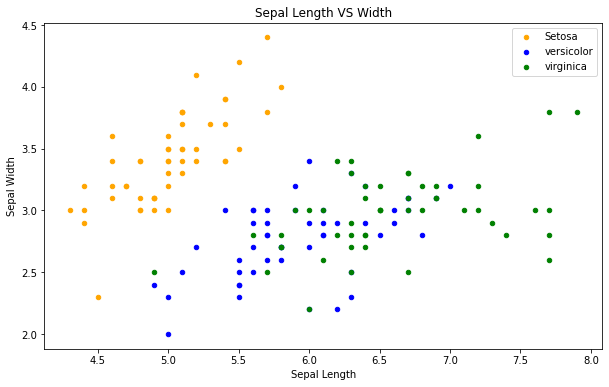

In [60]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


- 上面散点图可以看到setosa类的花萼特征明显区分其他2类花。

### 1.5 花瓣的长、宽数据二维散点图

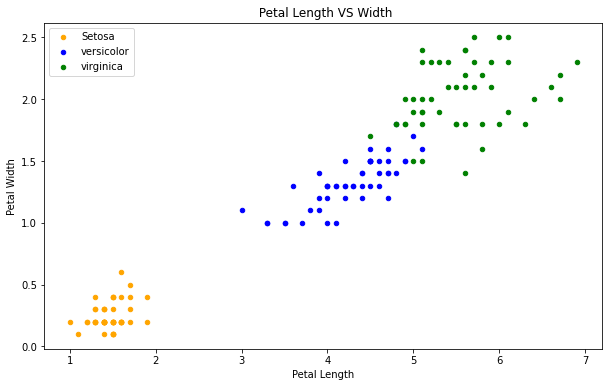

In [61]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

- 上面散点图可以看到setosa类的花萼特征明显区分其他2类花。versicolor和virginica要能区分。

### 1.6 绘制每个特征值的小提琴图

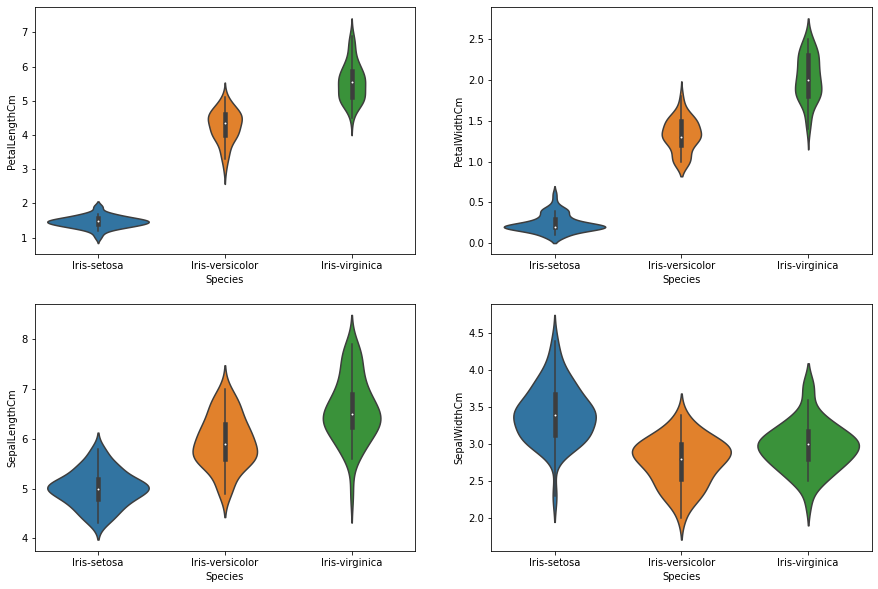

In [62]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

### 1.7 绘制特征值双变量关系图

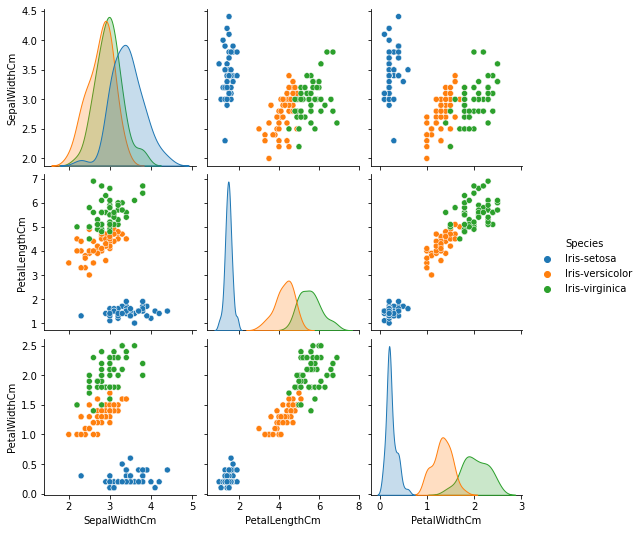

In [63]:
sns.pairplot(data=iris[iris.columns[1:6]], hue='Species')
plt.show()

- 主对角线是对应单变量的直方图分布(默认)。
- 其他为两两变量二维关系图。

### 1.8 绘制多元数据Andrews曲线

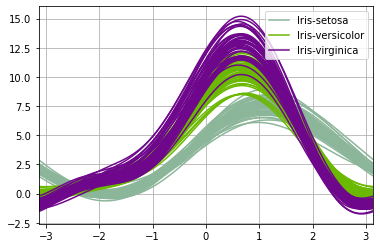

In [64]:
 
# Creating Andrews curves 
x = pd.plotting.andrews_curves(iris, "Species")
  
# ploting the Curve 
x.plot() 
  
# Display 
plt.show()


- Andrews曲线将每个样本的属性值转化为傅里叶序列的系数来创建曲线。

# 2.训练训练

### 2.1归一化处理

In [65]:

# We all ready loaded the data set
iris.head()
df_norm = iris[iris.columns[0:4]].apply(lambda x:(x - x.min())/(x.max() - x.min()))
df_norm.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
101,0.416667,0.291667,0.694915,0.750000
134,0.500000,0.250000,0.779661,0.541667
70,0.444444,0.500000,0.644068,0.708333
126,0.527778,0.333333,0.644068,0.708333
68,0.527778,0.083333,0.593220,0.583333


### 2.2 种类标签变为数字

In [66]:
target = iris[['Species']].replace(iris['Species'].unique(), [0,1,2])
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
121,0.361111,0.333333,0.661017,0.791667,2
101,0.416667,0.291667,0.694915,0.750000,2
129,0.805556,0.416667,0.813559,0.625000,2
51,0.583333,0.500000,0.593220,0.583333,1
32,0.250000,0.875000,0.084746,0.000000,0


### 2.3 构建模型

In [67]:
import keras

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [68]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

### 2.3 数据拆分

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

### 2.4 创建模型

In [70]:
model = Sequential()
model.add(Dense( 12, input_dim=4, activation = 'relu'))
model.add(Dense( units = 15, activation= 'relu'))
model.add(Dense( units = 8, activation= 'relu'))
model.add(Dense( units = 10, activation= 'relu'))
model.add(Dense( units = 3, activation= 'softmax'))
#交叉熵验证
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#训练
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))
print("end ")

Epoch 1/100
4/4 [==============================] - 1s 84ms/step - loss: 1.1972 - accuracy: 0.0462 - val_loss: 1.1253 - val_accuracy: 0.0667
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 1.1661 - accuracy: 0.0862 - val_loss: 1.1071 - val_accuracy: 0.1333
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 1.1403 - accuracy: 0.2215 - val_loss: 1.0923 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 1.1171 - accuracy: 0.2944 - val_loss: 1.0803 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0967 - accuracy: 0.5223 - val_loss: 1.0708 - val_accuracy: 0.6333
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0881 - accuracy: 0.6002 - val_loss: 1.0632 - val_accuracy: 0.5667
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 1.0774 - accuracy: 0.5765 - val_loss: 1.0557 - val_accuracy: 0.5667
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 20ms/step - loss: 0.5621 - accuracy: 0.8856 - val_loss: 0.5065 - val_accuracy: 0.8333
Epoch 60/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5464 - accuracy: 0.9044 - val_loss: 0.4977 - val_accuracy: 0.8333
Epoch 61/100
4/4 [==============================] - 0s 19ms/step - loss: 0.5453 - accuracy: 0.8565 - val_loss: 0.4891 - val_accuracy: 0.8000
Epoch 62/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5262 - accuracy: 0.8667 - val_loss: 0.4790 - val_accuracy: 0.8000
Epoch 63/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5152 - accuracy: 0.8417 - val_loss: 0.4692 - val_accuracy: 0.8333
Epoch 64/100
4/4 [==============================] - 0s 21ms/step - loss: 0.5157 - accuracy: 0.8698 - val_loss: 0.4591 - val_accuracy: 0.8000
Epoch 65/100
4/4 [==============================] - 0s 21ms/step - loss: 0.4953 - accuracy: 0.8625 - val_loss: 0.4483 - val_accuracy: 0.8000
Epoch 66/100
4/4 [========

### 2.5训练过程和测试过程的准确度变化

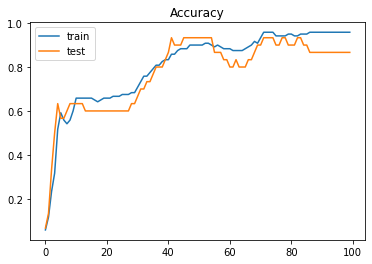

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

### 2.6训练过程和测试过程的损失变化

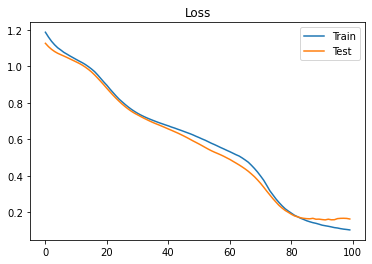

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()